In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
EARTHRADIUS = 6371.0
from numpy import pi, sin, cos, arctan2

def getDistanceByHaversine(loc1, loc2):
    '''Haversine formula - give coordinates as a 2D numpy array of
    (lat_denter link description hereecimal,lon_decimal) pairs'''
    #      
    # "unpack" our numpy array, this extracts column wise arrays
    lat1 = loc1[1]
    lon1 = loc1[0]
    lat2 = loc2[1]
    lon2 = loc2[0]
    #
    # convert to radians ##### Completely identical
    lon1 = lon1 * pi / 180.0
    lon2 = lon2 * pi / 180.0
    lat1 = lat1 * pi / 180.0
    lat2 = lat2 * pi / 180.0
    #
    # haversine formula #### Same, but atan2 named arctan2 in numpy
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2.0))**2
    c = 2.0 * arctan2(sqrt(a), sqrt(1.0-a))
    km = EARTHRADIUS * c
    return km



In [4]:
dataset = rasterio.open("data/brighton/elevation.tif")

# get the first "band"
# this is a numpy array
# now dataset.index(lat, lon) gives the array index for that point
band1 = dataset.read(1)

# need to flip lngs because the top of the image has greater lng
lats = np.arange(dataset.bounds.left, dataset.bounds.right, (dataset.bounds.right - dataset.bounds.left)/3601)
lngs = np.arange( dataset.bounds.top, dataset.bounds.bottom, -(dataset.bounds.top - dataset.bounds.bottom)/3601)



In [5]:
from shapely.geometry import Polygon
poly = Polygon([
    ( -71.13517512630062 , 42.34601426133963),
    ( -71.13527926858346 , 42.34594945862635),
    ( -71.13990717185605 , 42.342208064986295),
    ( -71.14007106881058 , 42.342096955055865),
    ( -71.14109630397537 , 42.34124435563773),
    ( -71.14132754554964 , 42.34105601035461),
    ( -71.14145063589106 , 42.34088421127861),
    ( -71.1416201548801 , 42.34064955095919),
    ( -71.14175105499918 , 42.340404070056024),
    ( -71.14194057906252 , 42.340016546521895),
    ( -71.14239611539706 , 42.340069342654964),
    ( -71.14421278278591 , 42.340030527522686),
    ( -71.14527668945935 , 42.33934449030121),
    ( -71.1461628203896 , 42.33870565097288),
    ( -71.1462461727479 , 42.33860287656667),
    ( -71.14660698366474 , 42.3385454002771),
    ( -71.14649061893837 , 42.338169571821915),
    ( -71.14634340929862 , 42.33804457992794),
    ( -71.14615731165176 , 42.33745015751352),
    ( -71.14732371070595 , 42.33719549651191),
    ( -71.1487431864981 , 42.336873321298825),
    ( -71.14829598509282 , 42.3358150348625),
    ( -71.15005990973823 , 42.33540120137244),
    ( -71.150134943123 , 42.33521788937546),
    ( -71.15046270960025 , 42.3349762476648),
    ( -71.14985437567445 , 42.33464290857688),
    ( -71.15688806157576 , 42.33024883836002),
    ( -71.15703805154585 , 42.33039882724327),
    ( -71.15866572822763 , 42.331995962177295),
    ( -71.15918237483358 , 42.33250427758885),
    ( -71.15963391199031 , 42.33288427558011),
    ( -71.16007676598491 , 42.333123717890544),
    ( -71.16083509445559 , 42.333495920513954),
    ( -71.16140672557752 , 42.33373316463674),
    ( -71.16199114178704 , 42.333861858567396),
    ( -71.16244355984 , 42.3339000499667),
    ( -71.16271407232335 , 42.33389263545344),
    ( -71.16305729611778 , 42.33385984097838),
    ( -71.1653042579272 , 42.33363401121675),
    ( -71.16752954566887 , 42.33336822081329),
    ( -71.16819054777527 , 42.334798726273),
    ( -71.16847277365217 , 42.33509377364092),
    ( -71.16857107922297 , 42.335151500218515),
    ( -71.16888772037292 , 42.33583482015705),
    ( -71.16885989610036 , 42.33631256786414),
    ( -71.1691237213111 , 42.33738475615098),
    ( -71.1692181457312 , 42.338076399841334),
    ( -71.16893755475583 , 42.3384569525851),
    ( -71.16863478430336 , 42.338637481028506),
    ( -71.16841254344212 , 42.338715256976556),
    ( -71.16680974501531 , 42.339298541436676),
    ( -71.16668471591083 , 42.34011239315564),
    ( -71.17485088492676 , 42.3503456368835),
    ( -71.17391753499108 , 42.353473350758954),
    ( -71.16862606913477 , 42.35896466461791),
    ( -71.16843925956748 , 42.35915029324653),
    ( -71.16839883005923 , 42.359159032737),
    ( -71.16834325269821 , 42.359173965687674),
    ( -71.16831700201938 , 42.35918189258498),
    ( -71.16827251108357 , 42.35919960155781),
    ( -71.16825335182233 , 42.35920754980421),
    ( -71.1682434638875 , 42.35921186604514),
    ( -71.16823388545126 , 42.359215496260816),
    ( -71.16822554631665 , 42.35921821626298),
    ( -71.16821350369834 , 42.35922161159295),
    ( -71.16820887884394 , 42.35922159824462),
    ( -71.16820517416096 , 42.359222502241806),
    ( -71.1682014694871 , 42.359223635811574),
    ( -71.16819281721281 , 42.35922704092484),
    ( -71.16818570656979 , 42.3592306791597),
    ( -71.16817363995212 , 42.359238646964755),
    ( -71.16816745668703 , 42.35924206010329),
    ( -71.16816157934059 , 42.359245700996404),
    ( -71.16815323179851 , 42.359250021676125),
    ( -71.16814951629867 , 42.35925275501976),
    ( -71.16814489265589 , 42.35925274167243),
    ( -71.16813655350782 , 42.359255462568356),
    ( -71.16809797461237 , 42.359262440035764),
    ( -71.16805939572195 , 42.35926964616276),
    ( -71.16801616555219 , 42.3592818696381),
    ( -71.16797386033768 , 42.35929409576879),
    ( -71.16795810460822 , 42.35930022441678),
    ( -71.167938945277 , 42.359308172610625),
    ( -71.16789319081701 , 42.359331365025234),
    ( -71.16784620062407 , 42.35935501119601),
    ( -71.16782951267419 , 42.35936228049506),
    ( -71.16780542013106 , 42.359370443084345),
    ( -71.16778132396499 , 42.35937906300307),
    ( -71.16776216100806 , 42.35938815451919),
    ( -71.16774269571646 , 42.35939587312364),
    ( -71.16766326884306 , 42.35943131643085),
    ( -71.1676391690407 , 42.35944085099898),
    ( -71.16761630372005 , 42.35944993178656),
    ( -71.16760301331321 , 42.35945629618648),
    ( -71.16759003120495 , 42.35946220413145),
    ( -71.16757551108832 , 42.35946765028262),
    ( -71.1675514244834 , 42.35947466947378),
    ( -71.16752611419224 , 42.35947985574133),
    ( -71.16750080269452 , 42.35948527067224),
    ( -71.16748414473255 , 42.35948682319703),
    ( -71.16745637746345 , 42.359490401635306),
    ( -71.16743848739068 , 42.35949149324443),
    ( -71.16743108759233 , 42.35949147183719),
    ( -71.16738794736155 , 42.35948654490419),
    ( -71.16736483622566 , 42.35948396263635),
    ( -71.1673531295034 , 42.359482099382234),
    ( -71.16734234294444 , 42.35948115347942),
    ( -71.16733494436119 , 42.35948113206951),
    ( -71.16731336040587 , 42.35948106960751),
    ( -71.16729177285175 , 42.35948192182073),
    ( -71.16728343845432 , 42.35948372707858),
    ( -71.1672751040564 , 42.35948553233588),
    ( -71.16726646133313 , 42.359487336700106),
    ( -71.16724980336484 , 42.359488889190956),
    ( -71.16723160738131 , 42.35948975120997),
    ( -71.16721341019381 , 42.35949084189507),
    ( -71.16719798191252 , 42.35949308395556),
    ( -71.16718717970787 , 42.35949511073455),
    ( -71.16717173577764 , 42.359500325487794),
    ( -71.16715474540527 , 42.35950645045127),
    ( -71.16712230988735 , 42.35951801882783),
    ( -71.16710780055219 , 42.35952140689932),
    ( -71.16709359472497 , 42.35952571053768),
    ( -71.16707999349674 , 42.359532073977135),
    ( -71.16706577682932 , 42.359538435632594),
    ( -71.167047559156 , 42.35954341366363),
    ( -71.1670355152085 , 42.35954703753893),
    ( -71.16702347729 , 42.35954974674075),
    ( -71.1669935492629 , 42.359553318808665),
    ( -71.16695375724295 , 42.359556633619604),
    ( -71.16691304747036 , 42.35955857372301),
    ( -71.16689608718168 , 42.35955921059697),
    ( -71.16687789839193 , 42.359558471873854),
    ( -71.16686125485215 , 42.35955728028105),
    ( -71.16682764740067 , 42.3595571828841),
    ( -71.16678448186694 , 42.35955705777265),
    ( -71.16674099836676 , 42.35955876110276),
    ( -71.16672189184325 , 42.35955687633231),
    ( -71.16669939253804 , 42.359555210394355),
    ( -71.16667535401868 , 42.3595530826441),
    ( -71.16665346654459 , 42.35955233316092),
    ( -71.16663096362608 , 42.359551353216396),
    ( -71.16658505693019 , 42.359544817252505),
    ( -71.16656933596344 , 42.3595440856381),
    ( -71.16656348863738 , 42.35954201062599),
    ( -71.16655732936103 , 42.35954039205364),
    ( -71.16655148082985 , 42.35953854570982),
    ( -71.16654440864077 , 42.35953486733707),
    ( -71.16653948992216 , 42.359532336772155),
    ( -71.16653488192014 , 42.35952889331885),
    ( -71.16652996440357 , 42.35952613498483),
    ( -71.16652505049258 , 42.3595224628716),
    ( -71.16652136024418 , 42.359520621886844),
    ( -71.1665167401922 , 42.359519693794724),
    ( -71.16651182024931 , 42.35951693545288),
    ( -71.1665072002056 , 42.35951623603285),
    ( -71.16650350030515 , 42.359516225299345),
    ( -71.16649641243966 , 42.35951529004715),
    ( -71.16648778537693 , 42.35951435032905),
    ( -71.16648069390122 , 42.35951432975518),
    ( -71.16647329288668 , 42.35951430828282),
    ( -71.16646742988661 , 42.359515205962055),
    ( -71.16646003129965 , 42.35951518449589),
    ( -71.16645293138048 , 42.359516764602915),
    ( -71.16644707320472 , 42.35951674760538),
    ( -71.16642884703258 , 42.359523098448825),
    ( -71.16640381722051 , 42.35953377252188),
    ( -71.16640010766785 , 42.35953559113659),
    ( -71.16639639932147 , 42.359537181082224),
    ( -71.16639299688713 , 42.35953922926038),
    ( -71.16638929336601 , 42.35953990453006),
    ( -71.16638558380518 , 42.35954149447183),
    ( -71.16638187787095 , 42.359542627079094),
    ( -71.16637694105627 , 42.35954352744162),
    ( -71.16637478156622 , 42.35954352117447),
    ( -71.16637231255926 , 42.35954420002629),
    ( -71.1663701566887 , 42.35954350775224),
    ( -71.16636892338802 , 42.35954350417293),
    ( -71.16636892821404 , 42.35954258949715),
    ( -71.1663673865882 , 42.35954258502301),
    ( -71.16636739262078 , 42.35954144167835),
    ( -71.16636647126488 , 42.359540752986995),
    ( -71.16636647971052 , 42.35953915230441),
    ( -71.16636524762384 , 42.35953914872859),
    ( -71.16636525365644 , 42.359538005383875),
    ( -71.16636402880157 , 42.35953640112192),
    ( -71.16636280635502 , 42.359534340422364),
    ( -71.16636158029122 , 42.35953273525659),
    ( -71.1663566663942 , 42.359529062235914),
    ( -71.16634007234315 , 42.35951849514101),
    ( -71.16632317239319 , 42.35950769848332),
    ( -71.16631611470596 , 42.35950127516889),
    ( -71.16630874627462 , 42.35949507962443),
    ( -71.16630291223584 , 42.359490489240656),
    ( -71.16630075879563 , 42.359489796972305),
    ( -71.16629830546368 , 42.35948704578135),
    ( -71.16629584731197 , 42.3594854379386),
    ( -71.16629339157394 , 42.35948337275791),
    ( -71.1662921763762 , 42.35947993914366),
    ( -71.16629125622883 , 42.35947902178275),
    ( -71.16628972426597 , 42.35947741662848),
    ( -71.16628973512712 , 42.359475358608),
    ( -71.1662885102754 , 42.35947375434523),
    ( -71.16628851630941 , 42.3594726110005),
    ( -71.16628759856866 , 42.35947100762925),
    ( -71.16628760218907 , 42.359470321622425),
    ( -71.16628483812705 , 42.35946825554646),
    ( -71.1662839216004 , 42.359466652178696),
    ( -71.16628176936095 , 42.3594655025686),
    ( -71.16627899805837 , 42.35946480850618),
    ( -71.16627531747054 , 42.359461139062226),
    ( -71.16626947860985 , 42.35945746335246),
    ( -71.16626364337051 , 42.35945310163566),
    ( -71.16624063609234 , 42.35943085361249),
    ( -71.16621824185818 , 42.35940929338191),
    ( -71.1661896763225 , 42.35938862991676),
    ( -71.1661620357785 , 42.35936796913053),
    ( -71.16614975834183 , 42.35935741454305),
    ( -71.1661381072164 , 42.3593450323935),
    ( -71.16613196850184 , 42.35933975509855),
    ( -71.16612460253332 , 42.359333329976415),
    ( -71.16611784837541 , 42.359327823121085),
    ( -71.16609603706257 , 42.35931266648763),
    ( -71.1660745292444 , 42.3592984272219),
    ( -71.16606133652499 , 42.35928604058631),
    ( -71.16604690206168 , 42.3592752510491),
    ( -71.16602663240296 , 42.35926009888071),
    ( -71.16601218466573 , 42.35925182469758),
    ( -71.1659968143769 , 42.35924309048721),
    ( -71.16598360476897 , 42.3592339061082),
    ( -71.1659670156895 , 42.35922242428294),
    ( -71.16595750476961 , 42.35921347842031),
    ( -71.16594769398398 , 42.35920270140552),
    ( -71.16593666561485 , 42.35918940725501),
    ( -71.16593238170394 , 42.35918299107655),
    ( -71.16592625390088 , 42.35917588442242),
    ( -71.16592011038784 , 42.35917152179181),
    ( -71.1659155096957 , 42.35916693587244),
    ( -71.16589983594943 , 42.35915705650436),
    ( -71.16587585923168 , 42.35914349604267),
    ( -71.16585187527319 , 42.35913107801697),
    ( -71.1658315730793 , 42.35912209987559),
    ( -71.16582111305482 , 42.359117724691856),
    ( -71.16581126967256 , 42.35911312262734),
    ( -71.16579928375239 , 42.35910599893606),
    ( -71.16579221890635 , 42.35910071893012),
    ( -71.16578608266676 , 42.35909521295106),
    ( -71.16577410882886 , 42.359085345222525),
    ( -71.16573817526503 , 42.359058714736406),
    ( -71.16573110680324 , 42.35905435030635),
    ( -71.16571788761202 , 42.3590469934475),
    ( -71.16570497069729 , 42.359040781728865),
    ( -71.16569268010198 , 42.35903274245038),
    ( -71.16568100615507 , 42.35902470496386),
    ( -71.1656628671091 , 42.3590148192936),
    ( -71.16563612284833 , 42.35899964912449),
    ( -71.16560999040831 , 42.35898539541867),
    ( -71.1655918622685 , 42.3589734517164),
    ( -71.16557281158735 , 42.35896104798246),
    ( -71.16556112920297 , 42.358954611166425),
    ( -71.16554759446849 , 42.35894862630495),
    ( -71.16553591208896 , 42.35894218948632),
    ( -71.16552515346888 , 42.35893598402672),
    ( -71.16551901000679 , 42.358931621374474),
    ( -71.16551409620543 , 42.358927948317294),
    ( -71.16550459023235 , 42.35891808774075),
    ( -71.16549663071112 , 42.35890731697338),
    ( -71.1654892878366 , 42.358896547999784),
    ( -71.16548225328657 , 42.35888577992296),
    ( -71.16547584385083 , 42.3588734129573),
    ( -71.16546913093474 , 42.35886013041816),
    ( -71.16546178807515 , 42.35884936054243),
    ( -71.16545352024339 , 42.358838589774955),
    ( -71.16544401913256 , 42.35882781451733),
    ( -71.16542713040516 , 42.35881473103303),
    ( -71.16541055726609 , 42.358800276429825),
    ( -71.16539243285189 , 42.35878764578841),
    ( -71.1653779877257 , 42.35877891418679),
    ( -71.16536630055427 , 42.35877339202656),
    ( -71.16536261037375 , 42.35877155280487),
    ( -71.16535768691269 , 42.358769709092606),
    ( -71.16535400158284 , 42.35876695339417),
    ( -71.16534693802572 , 42.35876167336409),
    ( -71.16534233619466 , 42.35875731609026),
    ( -71.16533588565625 , 42.35875272296128),
    ( -71.16532546323704 , 42.35874103122168),
    ( -71.16530889499009 , 42.35872588969991),
    ( -71.16529077545424 , 42.35871234526674),
    ( -71.1652775781688 , 42.35870087321545),
    ( -71.16526469283717 , 42.35868848738103),
    ( -71.16523583414472 , 42.35866507875008),
    ( -71.16522262840782 , 42.35865543604775),
    ( -71.16521556608475 , 42.35864992734045),
    ( -71.16514943695248 , 42.35861954996425),
    ( -71.16512913864773 , 42.358609657918585),
    ( -71.1651073011743 , 42.35859976138544),
    ( -71.16508977292253 , 42.3585907920926),
    ( -71.16507285768584 , 42.3585827392731),
    ( -71.16504978936874 , 42.35857215312529),
    ( -71.16502610199592 , 42.35856202251388),
    ( -71.16501196044653 , 42.358554206440175),
    ( -71.16499844280995 , 42.35854502014781),
    ( -71.16498893091737 , 42.358536302872736),
    ( -71.16497818332361 , 42.35852803934059),
    ( -71.16496620245435 , 42.35852000088555),
    ( -71.16495545244084 , 42.35851196601672),
    ( -71.16494010186419 , 42.358499572959985),
    ( -71.16492567747001 , 42.35848695302803),
    ( -71.16491985694881 , 42.3584798481145),
    ( -71.1649149626052 , 42.35847251632762),
    ( -71.16490180785546 , 42.358453039917976),
    ( -71.16489600188181 , 42.35844319097541),
    ( -71.16488865916348 , 42.358432421962355),
    ( -71.16488252064165 , 42.35842714459965),
    ( -71.1648766916524 , 42.35842163946648),
    ( -71.16486932954922 , 42.358414529155915),
    ( -71.16486103279343 , 42.35840924550017),
    ( -71.16484904105184 , 42.35840303638107),
    ( -71.16483088776957 , 42.35839589460599),
    ( -71.16481429184643 , 42.35838578462615),
    ( -71.16480014672615 , 42.35837865453305),
    ( -71.16478447456322 , 42.35836877501471),
    ( -71.16476171954096 , 42.358357275031736),
    ( -71.16473773609931 , 42.35834485677145),
    ( -71.16471252908843 , 42.358330376884645),
    ( -71.16470054344028 , 42.35832325307758),
    ( -71.16468763162347 , 42.35831612656769),
    ( -71.16467901201938 , 42.35831335825496),
    ( -71.16467163298041 , 42.35830967706961),
    ( -71.16465625461682 , 42.35830254336112),
    ( -71.1646442641235 , 42.358296106451846),
    ( -71.16463227485383 , 42.35828921039927),
    ( -71.16462152128456 , 42.358282090178236),
    ( -71.16461077499584 , 42.358273826614834),
    ( -71.16460832663695 , 42.358270389383655),
    ( -71.16460587220827 , 42.358267867725104),
    ( -71.16460127410862 , 42.358263052186466),
    ( -71.16459636284203 , 42.35825869217873),
    ( -71.16458807582806 , 42.35825158005146),
    ( -71.16457824480644 , 42.35824514763533),
    ( -71.16456656993344 , 42.35823733870327),
    ( -71.16455918969119 , 42.35823365840742),
    ( -71.16455211776382 , 42.35822997991104),
    ( -71.16454473267096 , 42.358227214290174),
    ( -71.16453642020117 , 42.35822490240737),
    ( -71.16451362887938 , 42.358220033772135),
    ( -71.16447543497534 , 42.35821306212444),
    ( -71.16443569462757 , 42.35820677286771),
    ( -71.16442245027501 , 42.35820399013515),
    ( -71.16441073053188 , 42.358204641039535),
    ( -71.16439132466355 , 42.35820115429831),
    ( -71.16436268987349 , 42.35819375317519),
    ( -71.16433373463319 , 42.35818863783457),
    ( -71.1643109336286 , 42.35818582718355),
    ( -71.16428567093405 , 42.358182094648804),
    ( -71.16426871827261 , 42.35818113044899),
    ( -71.16426162694718 , 42.35818110973828),
    ( -71.16425299767161 , 42.35818039851769),
    ( -71.16424345072575 , 42.358178312580904),
    ( -71.16420495220157 , 42.35817042526328),
    ( -71.16416552994626 , 42.3581623065616),
    ( -71.164132876131 , 42.35815672302001),
    ( -71.16409960082527 , 42.35815228101573),
    ( -71.16408264938853 , 42.35815131679203),
    ( -71.16406600505778 , 42.358150124790754),
    ( -71.16402655974777 , 42.358146579424705),
    ( -71.1640179389856 , 42.358144038831036),
    ( -71.16400469709227 , 42.358141256057415),
    ( -71.16399300286935 , 42.35813687709823),
    ( -71.16397947088839 , 42.35813043471311),
    ( -71.16397208704608 , 42.358127669059),
    ( -71.163965316198 , 42.3581251338688),
    ( -71.16395177450062 , 42.35812052083236),
    ( -71.1639339114896 , 42.35811680985139),
    ( -71.16391728053804 , 42.35811333114223),
    ( -71.16390280295371 , 42.3581107734167),
    ( -71.16388954527325 , 42.35811073465412),
    ( -71.16387752207919 , 42.3581106994996),
    ( -71.1638352727694 , 42.35811217666501),
    ( -71.16380442636472 , 42.35811483052694),
    ( -71.16377296940044 , 42.358116339232055),
    ( -71.16374058991204 , 42.35811738788497),
    ( -71.16372024091213 , 42.35811732835962),
    ( -71.16369835640204 , 42.358116120975815),
    ( -71.16367801105119 , 42.35811537543603),
    ( -71.16365519550662 , 42.358115308682805),
    ( -71.16363114668944 , 42.358115238316394),
    ( -71.16362313041705 , 42.35811521485982),
    ( -71.16361820705774 , 42.35811337107279),
    ( -71.16361451210561 , 42.35811244557042),
    ( -71.16361081715355 , 42.35811152006788),
    ( -71.163607125851 , 42.35810990855825),
    ( -71.16360220370909 , 42.35810783610162),
    ( -71.16359758745256 , 42.35810622188496),
    ( -71.1635926628809 , 42.358104378093316),
    ( -71.16358804418915 , 42.358103449886805),
    ( -71.16358311474899 , 42.358102749443255),
    ( -71.16357355688771 , 42.35810272147173),
    ( -71.1634906339199 , 42.35809973468992),
    ( -71.1634752180153 , 42.35809968956179),
    ( -71.16345948892781 , 42.35810032953231),
    ( -71.16342958328663 , 42.35810024197727),
    ( -71.16340924281283 , 42.35809858171399),
    ( -71.16338859158745 , 42.358097377882295),
    ( -71.16324801072619 , 42.35809445074995),
    ( -71.16319774148475 , 42.35809681887741),
    ( -71.16316288692573 , 42.3580994608239),
    ( -71.16314962437559 , 42.35810033665197),
    ( -71.16313604863436 , 42.35810212625095),
    ( -71.16312649077328 , 42.35810209824226),
    ( -71.1631156996399 , 42.35810206661863),
    ( -71.16307622639482 , 42.35810355164066),
    ( -71.16303551378277 , 42.358106176379),
    ( -71.16302102648706 , 42.358105447894324),
    ( -71.1630065355358 , 42.35810540541474),
    ( -71.16298493864342 , 42.3581080861717),
    ( -71.16296457502669 , 42.35811054186782),
    ( -71.16294513391509 , 42.358113914955474),
    ( -71.16287571356656 , 42.35812285829267),
    ( -71.1628562895203 , 42.358122801327006),
    ( -71.16283347763715 , 42.35812181973128),
    ( -71.16281190633248 , 42.35811992707972),
    ( -71.1627986437787 , 42.35812057419479),
    ( -71.16278539584675 , 42.35811893462566),
    ( -71.16277089880076 , 42.35811980678874),
    ( -71.1627638160192 , 42.35811818530283),
    ( -71.16275642248085 , 42.35811702024991),
    ( -71.1627484001107 , 42.358118140077266),
    ( -71.16273976841578 , 42.358118114753594),
    ( -71.162723110697 , 42.35811966658923),
    ( -71.1626928955156 , 42.358119577934495),
    ( -71.16268210316561 , 42.3581195462666),
    ( -71.16267255018151 , 42.358118603544284),
    ( -71.1626568259548 , 42.358118557401724),
    ( -71.16264263843911 , 42.35811943045696),
    ( -71.16262814382488 , 42.358120073936654),
    ( -71.16261950481572 , 42.358121191945266),
    ( -71.16261240861724 , 42.358122085808795),
    ( -71.16259206083073 , 42.35812202608737),
    ( -71.16257293534784 , 42.35812357065809),
    ( -71.16255843463065 , 42.35812535747384),
    ( -71.1625439387939 , 42.35812622961189),
    ( -71.16253068111105 , 42.358126190692715),
    ( -71.16251742830974 , 42.35812523709603),
    ( -71.16250571587948 , 42.3581245166928),
    ( -71.16249214987874 , 42.35812447686394),
    ( -71.16247302560656 , 42.3581260214216),
    ( -71.16242489866899 , 42.35813136824471),
    ( -71.16233603219749 , 42.35814437025585),
    ( -71.16230701730659 , 42.358150459184536),
    ( -71.16229157818732 , 42.35815475860816),
    ( -71.16227614272975 , 42.35815837202282),
    ( -71.16224928971947 , 42.358163781270584),
    ( -71.16222151297089 , 42.35816895912521),
    ( -71.16220760811196 , 42.3581744064086),
    ( -71.16219896785869 , 42.35817598172712),
    ( -71.16219155355705 , 42.35817870401039),
    ( -71.16218198591967 , 42.358180276602425),
    ( -71.16217365032632 , 42.35818231015949),
    ( -71.16215296977576 , 42.35818659416119),
    ( -71.16215080788109 , 42.35818727382514),
    ( -71.16214709706341 , 42.3581893209722),
    ( -71.162143393576 , 42.35818999610532),
    ( -71.1621400020724 , 42.35818998613756),
    ( -71.16213753063714 , 42.358190893564114),
    ( -71.16213382104067 , 42.35819271204177),
    ( -71.1621304393113 , 42.358190872721984),
    ( -71.16212797276319 , 42.35819086547244),
    ( -71.16212550742891 , 42.35819085822644),
    ( -71.16212304576811 , 42.35818993630091),
    ( -71.16212181615956 , 42.35818924666919),
    ( -71.16211965671616 , 42.358189240322105),
    ( -71.16211812001102 , 42.358188321115136),
    ( -71.16211719626936 , 42.35818831840002),
    ( -71.16211596910459 , 42.35818717143025),
    ( -71.16211350255665 , 42.3581871641804),
    ( -71.16211226928263 , 42.35818716055547),
    ( -71.16211134311332 , 42.358187157833186),
    ( -71.16211011105315 , 42.35818715421179),
    ( -71.16210856824684 , 42.358187149677),
    ( -71.16210763839574 , 42.35818829030663),
    ( -71.16210640512178 , 42.35818828668167),
    ( -71.16210516696015 , 42.35818919773252),
    ( -71.16210392880656 , 42.358189880110814),
    ( -71.16210145125648 , 42.358191931781725),
    ( -71.16210051896618 , 42.35819352884893),
    ( -71.16209896638436 , 42.358195353665806),
    ( -71.16209771966903 , 42.358197865399305),
    ( -71.16209678005028 , 42.35820060670806),
    ( -71.16209677516258 , 42.35820152138395),
    ( -71.16209553577863 , 42.35820266110363),
    ( -71.16209553210803 , 42.35820334801083),
    ( -71.1620955272203 , 42.35820426268669),
    ( -71.16209398318028 , 42.35820494326547),
    ( -71.16209397707058 , 42.35820608661031),
    ( -71.16209180907295 , 42.35820768094548),
    ( -71.1620893425242 , 42.358207673695134),
    ( -71.16208717940134 , 42.358208582927155),
    ( -71.16207483199322 , 42.35821129070186),
    ( -71.16206310243994 , 42.35821399939137),
    ( -71.16205075503318 , 42.35821647939126),
    ( -71.1620377909894 , 42.35821918444892),
    ( -71.16191239966328 , 42.35825883343586),
    ( -71.16179192660816 , 42.35830124082693),
    ( -71.16166084084053 , 42.35836785704815),
    ( -71.16160548893009 , 42.358397878899936),
    ( -71.16155229151298 , 42.358429050431),
    ( -71.1615426711927 , 42.35844045573458),
    ( -71.16153552352678 , 42.358451182299945),
    ( -71.16152929471829 , 42.358462597587966),
    ( -71.16152337911326 , 42.35847332778012),
    ( -71.16149415344626 , 42.35851874756195),
    ( -71.16146408479915 , 42.35854884379284),
    ( -71.16143493496294 , 42.358580086084515),
    ( -71.16141940997272 , 42.3586003922165),
    ( -71.16140604199236 , 42.35862093337219),
    ( -71.16139513567104 , 42.35864239646726),
    ( -71.16139136847588 , 42.358654962360774),
    ( -71.16138914410787 , 42.358667304126136),
    ( -71.16138911104655 , 42.358673478187406),
    ( -71.16138784470164 , 42.35867964861593),
    ( -71.16138534507283 , 42.35868581541171),
    ( -71.16138408239604 , 42.358691300733675),
    ( -71.16136483792124 , 42.35871525376209),
    ( -71.16133570265558 , 42.35874375200034),
    ( -71.16132021555569 , 42.358756970281576),
    ( -71.16138572144132 , 42.35878849139068),
    ( -71.1614349230997 , 42.358812646923674),
    ( -71.16143275015689 , 42.35881538459441),
    ( -71.161280377016 , 42.35899924578945),
    ( -71.1612775874152 , 42.359001981640226),
    ( -71.16119885658345 , 42.358964247337546),
    ( -71.16111120163892 , 42.35892374260242),
    ( -71.16105243959746 , 42.35889978741584),
    ( -71.16096099484423 , 42.358933361292394),
    ( -71.16092611275506 , 42.35894103327678),
    ( -71.16089030692967 , 42.35894824518063),
    ( -71.16085388810579 , 42.35895522659229),
    ( -71.16081899864496 , 42.35896404188512),
    ( -71.16076491343928 , 42.35898789291022),
    ( -71.16071205044025 , 42.35901380556984),
    ( -71.16064712231827 , 42.35904722878328),
    ( -71.1606359748357 , 42.35905611500449),
    ( -71.16062513077328 , 42.35906591500993),
    ( -71.16061644496239 , 42.359075722286406),
    ( -71.16060931058163 , 42.35908370476221),
    ( -71.16060248452196 , 42.359091688147856),
    ( -71.16059381834198 , 42.35909783672004),
    ( -71.1605851460185 , 42.35910512953634),
    ( -71.16057679430004 , 42.359110134772756),
    ( -71.1605672068237 , 42.35911559550537),
    ( -71.16055639097323 , 42.359120136119444),
    ( -71.16054558124935 , 42.35912353518844),
    ( -71.16053601219176 , 42.35912556408437),
    ( -71.16052521229163 , 42.359127132899985),
    ( -71.16051565058912 , 42.35912779158132),
    ( -71.16050484823761 , 42.359129816832585),
    ( -71.16048295361638 , 42.35913043818849),
    ( -71.16046258343418 , 42.359134036785576),
    ( -71.16043757241165 , 42.35914105175901),
    ( -71.1604119324711 , 42.35915012292192),
    ( -71.16036158492132 , 42.35916666727741),
    ( -71.16031805481911 , 42.359177287170176),
    ( -71.16027482813098 , 42.35918859306035),
    ( -71.16018835629548 , 42.3592144052527),
    ( -71.16018001803914 , 42.359216896902865),
    ( -71.16009906028529 , 42.35924958640392),
    ( -71.16002085277304 , 42.3592868574322),
    ( -71.16000632220906 , 42.3592941319791),
    ( -71.15999920371536 , 42.359299140820866),
    ( -71.15999331604742 , 42.35930461244823),
    ( -71.15998588799326 , 42.35930984994638),
    ( -71.15996669075228 , 42.359324885551274),
    ( -71.15994721715079 , 42.35933397484984),
    ( -71.15992680996287 , 42.359344662090976),
    ( -71.15990641875636 , 42.35935237663299),
    ( -71.15989190170926 , 42.35935690713512),
    ( -71.15987644122187 , 42.35936509360452),
    ( -71.1598619192173 , 42.35937099612331),
    ( -71.15984738248638 , 42.35937918442165),
    ( -71.15983623727692 , 42.35938784189946),
    ( -71.15982662509623 , 42.35939787504741),
    ( -71.15982197316697 , 42.35940289207724),
    ( -71.15981701415903 , 42.35940745085315),
    ( -71.15981113260486 , 42.359412006898786),
    ( -71.15980617603958 , 42.359416337008966),
    ( -71.15973393092509 , 42.35943395964936),
    ( -71.159616310335 , 42.35946128081806),
    ( -71.15955985860447 , 42.359466373122544),
    ( -71.15954166252266 , 42.35946723392492),
    ( -71.15952253775515 , 42.35946900666403),
    ( -71.15950340686481 , 42.359471465399324),
    ( -71.15948518615298 , 42.35947689957029),
    ( -71.15946850213608 , 42.359483252980475),
    ( -71.15943206315963 , 42.359493663970646),
    ( -71.15937309551468 , 42.35950789563096),
    ( -71.15936137425928 , 42.359508546917304),
    ( -71.15934903262213 , 42.35951033972676),
    ( -71.15933730149258 , 42.359513049034156),
    ( -71.15932495001624 , 42.3595164425195),
    ( -71.15931444604233 , 42.35952007015125),
    ( -71.15930578089244 , 42.35952621862936),
    ( -71.15929866108027 , 42.35953145699669),
    ( -71.15929154003486 , 42.3595369240324),
    ( -71.15928410082442 , 42.35954399083236),
    ( -71.15927729054742 , 42.35954923011573),
    ( -71.15926985995915 , 42.35955469623268),
    ( -71.15925904638176 , 42.35955900895928),
    ( -71.15924823035195 , 42.35956355125042),
    ( -71.15923710601861 , 42.35956786305382),
    ( -71.15922537487847 , 42.359570571449446),
    ( -71.15921302829585 , 42.35957327891975),
    ( -71.1592012934515 , 42.35957667421982),
    ( -71.15918926383782 , 42.35957755324708),
    ( -71.1591772330098 , 42.35957843226946),
    ( -71.1591652095395 , 42.35957839662232),
    ( -71.15915318364142 , 42.359578360966744),
    ( -71.15914115895725 , 42.3595783253135),
    ( -71.15912791204751 , 42.35957645665474),
    ( -71.1591146713399 , 42.3595729873052),
    ( -71.15910142814931 , 42.35957020396432),
    ( -71.15908942810422 , 42.359565823600796),
    ( -71.15907619849683 , 42.35956029622704),
    ( -71.15906912674481 , 42.35955661649429),
    ( -71.15906082169316 , 42.35955293310347),
    ( -71.15905220212868 , 42.35955062171469),
    ( -71.15904265763756 , 42.359547848436364),
    ( -71.15903434395747 , 42.359545765725656),
    ( -71.15902479451152 , 42.35954413669409),
    ( -71.1590164611031 , 42.35954571268396),
    ( -71.15900781441749 , 42.35954843110664),
    ( -71.15899916530338 , 42.35955114952144),
    ( -71.15899113033376 , 42.359554784447454),
    ( -71.15898248121322 , 42.359557503761266),
    ( -71.15897568077568 , 42.35956091367589),
    ( -71.15896825509785 , 42.35956546419758),
    ( -71.15894044909788 , 42.359575900642106),
    ( -71.15891141224978 , 42.35958587698318),
    ( -71.15888394416731 , 42.359590825375825),
    ( -71.15885525017154 , 42.35959439988947),
    ( -71.15879846526298 , 42.35960406338206),
    ( -71.15875647501537 , 42.35961468635448),
    ( -71.15873578882874 , 42.35961988441576),
    ( -71.15871448105112 , 42.359625995318076),
    ( -71.15869628491194 , 42.35962685598673),
    ( -71.15867839709283 , 42.359627718468154),
    ( -71.15866021577006 , 42.359625834204465),
    ( -71.15864233659184 , 42.35962509599829),
    ( -71.15856896503689 , 42.359622819152996),
    ( -71.15847645379756 , 42.35962528842498),
    ( -71.15842957844202 , 42.35962697943702),
    ( -71.15838393639072 , 42.35962867319461),
    ( -71.15834322757121 , 42.35963015202296),
    ( -71.15818226189123 , 42.35963333318228),
    ( -71.15809104082682 , 42.359625057471355),
    ( -71.1580438954753 , 42.359619657774466),
    ( -71.15799859516 , 42.35961494956479),
    ( -71.15798873490844 , 42.35961400554011),
    ( -71.15784357179913 , 42.35960282686853),
    ( -71.15775199796087 , 42.35960255427739),
    ( -71.15766072747758 , 42.359603424979106),
    ( -71.15756823606391 , 42.35960200704674),
    ( -71.1574757471414 , 42.35960012990173),
    ( -71.15744090888307 , 42.359599340076976),
    ( -71.15726333333508 , 42.359595152032625),
    ( -71.15724637665802 , 42.35959510147701),
    ( -71.15706730665978 , 42.359581990444994),
    ( -71.15701461777589 , 42.359575430426055),
    ( -71.15696038107448 , 42.35957000912694),
    ( -71.15692954855822 , 42.35956991711801),
    ( -71.15689808946578 , 42.359571652611095),
    ( -71.15683579288994 , 42.35957421073689),
    ( -71.15675998833902 , 42.359565980888426),
    ( -71.15668293684583 , 42.35956026356432),
    ( -71.1566098675479 , 42.359559130634395),
    ( -71.1565845799218 , 42.359559969786005),
    ( -71.15656053056338 , 42.35955989794115),
    ( -71.15653648617318 , 42.35955891141588),
    ( -71.15650876051487 , 42.35955448379798),
    ( -71.15649582698663 , 42.35955170018167),
    ( -71.15648136306642 , 42.35954639749303),
    ( -71.15646936820485 , 42.35954087350824),
    ( -71.15645644712814 , 42.35953557542693),
    ( -71.15644197945919 , 42.35953118741227),
    ( -71.15642874012222 , 42.35952771775707),
    ( -71.15638281461617 , 42.35952483642227),
    ( -71.15633625755119 , 42.35952469725175),
    ( -71.15624375512843 , 42.35952510670102),
    ( -71.15619781095415 , 42.35952588399741),
    ( -71.15615124645768 , 42.35952688809257),
    ( -71.15611393913989 , 42.35952677649822),
    ( -71.15606585164309 , 42.35952457458708),
    ( -71.15601777282711 , 42.35952100064648),
    ( -71.15586641270617 , 42.359515288175594),
    ( -71.15580997058305 , 42.35951854928876),
    ( -71.15575352720926 , 42.359522039043014),
    ( -71.15572732581663 , 42.35952081721678),
    ( -71.15571745941966 , 42.35952078766902),
    ( -71.15570913838233 , 42.359520076730945),
    ( -71.15569958529073 , 42.35951913342977),
    ( -71.15569096215445 , 42.35951727822275),
    ( -71.15568234275413 , 42.35951473700866),
    ( -71.15567433751389 , 42.359512654978516),
    ( -71.15567188585707 , 42.35950990356456),
    ( -71.15566850300007 , 42.35950829272413),
    ( -71.15566574301883 , 42.359505540386515),
    ( -71.15566359968258 , 42.35950279079609),
    ( -71.15566206677988 , 42.35950118459638),
    ( -71.15565992344885 , 42.35949843410564),
    ( -71.15565900719105 , 42.35949683065321),
    ( -71.15565624347506 , 42.359494764321845),
    ( -71.15565410014452 , 42.35949201383101),
    ( -71.15565256601863 , 42.35949040942804),
    ( -71.15565041269987 , 42.35948971606001),
    ( -71.15564302289944 , 42.35948763587115),
    ( -71.15563716472933 , 42.359487618323016),
    ( -71.15563008197758 , 42.35948599639826),
    ( -71.15562267841636 , 42.35948688891024),
    ( -71.1556168202464 , 42.35948687136104),
    ( -71.15560941671644 , 42.359487535199676),
    ( -71.15560355356466 , 42.359488432325165),
    ( -71.15559645586828 , 42.359489554424336),
    ( -71.15558997232533 , 42.359491136608455),
    ( -71.15558410419582 , 42.35949294750798),
    ( -71.15548317609944 , 42.35951208225215),
    ( -71.155455709054 , 42.359516573385136),
    ( -71.15536409792989 , 42.359523387630006),
    ( -71.15527155557804 , 42.35953134237232),
    ( -71.15518025398462 , 42.359537928726546),
    ( -71.15510221783114 , 42.359543182772285),
    ( -71.15501710020295 , 42.35954635746135),
    ( -71.15493167420237 , 42.359549760734616),
    ( -71.15486195526738 , 42.35955664029063),
    ( -71.15479346719478 , 42.35956352260018),
    ( -71.15471172108687 , 42.35957059462122),
    ( -71.15462998120051 , 42.35957652414027),
    ( -71.15446395607361 , 42.3596027790248),
    ( -71.15428743898866 , 42.35963060372671),
    ( -71.1541994424815 , 42.359652748976934),
    ( -71.15415620811689 , 42.35966519681066),
    ( -71.15411389996785 , 42.35967741784207),
    ( -71.15411174168834 , 42.35967741134831),
    ( -71.15402619410756 , 42.359702993922994),
    ( -71.15394094977772 , 42.35972949203725),
    ( -71.15393817484465 , 42.35972948368393),
    ( -71.15385416374632 , 42.359755985446334),
    ( -71.15376951593055 , 42.35978591531837),
    ( -71.15374325557755 , 42.359795669146116),
    ( -71.15366136756406 , 42.359828351321895),
    ( -71.1535807077223 , 42.35986218050315),
    ( -71.15357236411421 , 42.35986558544879),
    ( -71.15349416327273 , 42.359900794014834),
    ( -71.15345428510973 , 42.359919653632545),
    ( -71.15341472273046 , 42.359937370825634),
    ( -71.15338196115039 , 42.35995144974944),
    ( -71.15334240378516 , 42.35996802356993),
    ( -71.15330253180328 , 42.35998573979083),
    ( -71.15322186655271 , 42.36002048339437),
    ( -71.15321599328023 , 42.36002321064853),
    ( -71.15307131972081 , 42.36009137591101),
    ( -71.15301808664164 , 42.360127574188745),
    ( -71.15300136917774 , 42.36013987204799),
    ( -71.15298310755782 , 42.36015262258877),
    ( -71.15296392847641 , 42.36016399832167),
    ( -71.15293983497013 , 42.36017192822643),
    ( -71.15291357813076 , 42.36018076808552),
    ( -71.1528882675713 , 42.36018595113455),
    ( -71.15281106254483 , 42.36020789923439),
    ( -71.15274367495381 , 42.36023902384023),
    ( -71.15267505523846 , 42.3602699160115),
    ( -71.15261017811285 , 42.36029304458432),
    ( -71.1525449838156 , 42.360317772869855),
    ( -71.15247732660664 , 42.36034180765555),
    ( -71.15241151680621 , 42.360366305332285),
    ( -71.15233926854711 , 42.36038392332401),
    ( -71.15226579820514 , 42.3603997081934),
    ( -71.15212634537487 , 42.36041529337119),
    ( -71.15201929598913 , 42.36042571789941),
    ( -71.15197001118295 , 42.36041664957664),
    ( -71.15195831980037 , 42.36041226940334),
    ( -71.15195339538842 , 42.36041042511423),
    ( -71.15194755223776 , 42.36040766335319),
    ( -71.15189200888196 , 42.36041572739079),
    ( -71.15183676385408 , 42.36042516524078),
    ( -71.1517466334848 , 42.36044272780255),
    ( -71.15170218493269 , 42.360451512275624),
    ( -71.15165773759207 , 42.3604602949346),
    ( -71.15157348810004 , 42.36047353220221),
    ( -71.1514821595551 , 42.36048468899417),
    ( -71.15139053656239 , 42.36049310075006),
    ( -71.1512979922974 , 42.36050105139319),
    ( -71.1512295090686 , 42.360507017808104),
    ( -71.15113820438465 , 42.36051382962086),
    ( -71.15109163146234 , 42.36051643235216),
    ( -71.15104567519067 , 42.36051903783668),
    ( -71.15095314093746 , 42.3605251597527),
    ( -71.15086182736445 , 42.3605335711269),
    ( -71.15084269576188 , 42.36053625799373),
    ( -71.15075136194548 , 42.36054832888014),
    ( -71.15066093792423 , 42.36056314652945),
    ( -71.15057112298845 , 42.360579109321975),
    ( -71.15052667924246 , 42.36058697686508),
    ( -71.15048069888597 , 42.36059392592927),
    ( -71.1503905729469 , 42.36061057455339),
    ( -71.15038810630581 , 42.36061056705208),
    ( -71.15038594293762 , 42.360611475163275),
    ( -71.1502955187455 , 42.360626291624854),
    ( -71.1502498403363 , 42.36063438577851),
    ( -71.15020385486005 , 42.360642248506515),
    ( -71.15011405861958 , 42.36065501048379),
    ( -71.15006006922779 , 42.360660333396),
    ( -71.1499675410016 , 42.36066531117536),
    ( -71.1498750355466 , 42.36066617374364),
    ( -71.14982786099523 , 42.36066603006046),
    ( -71.14978253642646 , 42.3606658919937),
    ( -71.14969002337219 , 42.36066812552521),
    ( -71.14966318342363 , 42.36067078780671),
    ( -71.14957064501286 , 42.360677594616384),
    ( -71.1494793246931 , 42.36068714913648),
    ( -71.1494336562825 , 42.360693412715946),
    ( -71.14938830258701 , 42.36069830520165),
    ( -71.14929666494716 , 42.36070968798964),
    ( -71.14925717331651 , 42.36071391228866),
    ( -71.1491680150178 , 42.36072278714027),
    ( -71.14907547647773 , 42.36072959355145),
    ( -71.14898415600813 , 42.36073914767826),
    ( -71.14894805719047 , 42.36074338223049),
    ( -71.14885795603685 , 42.36075545537884),
    ( -71.14876661009382 , 42.36076958270678),
    ( -71.14867618407749 , 42.360784398791345),
    ( -71.14865458185177 , 42.36078776286177),
    ( -71.1485644589737 , 42.36080372314789),
    ( -71.14847555539133 , 42.36082220249008),
    ( -71.14842739216392 , 42.36083348883856),
    ( -71.14834060739582 , 42.36085906340609),
    ( -71.14829982123385 , 42.36087425970052),
    ( -71.14825750218279 , 42.36088830792753),
    ( -71.14824298394413 , 42.36089283785809),
    ( -71.14820127523333 , 42.360907801721915),
    ( -71.14815896122738 , 42.36092093523791),
    ( -71.1480746225221 , 42.360950175852174),
    ( -71.14801220463931 , 42.36097399538123),
    ( -71.14792999992885 , 42.36100758720224),
    ( -71.14785087845313 , 42.361041188408976),
    ( -71.14777143836587 , 42.361076618865944),
    ( -71.14775907449955 , 42.36108206912608),
    ( -71.14774732984371 , 42.36108706393699),
    ( -71.14770868891966 , 42.36110478199328),
    ( -71.14766911666574 , 42.36112341187265),
    ( -71.14759059239529 , 42.3611606734917),
    ( -71.14751452328446 , 42.36119977196539),
    ( -71.1474916365929 , 42.361212050109614),
    ( -71.14748202727654 , 42.36122116754715),
    ( -71.14747241540766 , 42.36123074232121),
    ( -71.14746404069314 , 42.3612396348705),
    ( -71.14743613771103 , 42.36126699001039),
    ( -71.14737823582377 , 42.36131048888529),
    ( -71.14731541454205 , 42.36135145814134),
    ( -71.14719384770848 , 42.361421287611776),
    ( -71.14712983759078 , 42.36145402000543),
    ( -71.14706490356029 , 42.361486977299286),
    ( -71.1470033063654 , 42.3615293221777),
    ( -71.14695728345085 , 42.361598925984744),
    ( -71.14694985526187 , 42.36160416264208),
    ( -71.1467257827618 , 42.36175325482829),
    ( -71.14672237701636 , 42.36175575976074),
    ( -71.14660920666823 , 42.36181258007775),
    ( -71.14652426499349 , 42.36189418371474),
    ( -71.14651123049205 , 42.36190923692572),
    ( -71.14653638248258 , 42.361932638858505),
    ( -71.14635537377472 , 42.36204527510584),
    ( -71.14622139434869 , 42.36212855794189),
    ( -71.14613132902424 , 42.36218887807307),
    ( -71.14605517841548 , 42.36224215302544),
    ( -71.14597436931179 , 42.36230135996788),
    ( -71.14592451173002 , 42.362339622509964),
    ( -71.14584768651632 , 42.36240295773799),
    ( -71.1457968653279 , 42.36244807833196),
    ( -71.1457327150155 , 42.362505734819045),
    ( -71.14565676432068 , 42.362578447286275),
    ( -71.1455832469826 , 42.362656655344594),
    ( -71.1455165385179 , 42.36273054047215),
    ( -71.14549014881558 , 42.36276270192425),
    ( -71.1454901090772 , 42.362769789749265),
    ( -71.14548848275885 , 42.36278487712003),
    ( -71.14548349546122 , 42.362794465986475),
    ( -71.14547667222067 , 42.36280153379361),
    ( -71.14546585464691 , 42.36280607478533),
    ( -71.14545474027534 , 42.362808555907925),
    ( -71.14544517017643 , 42.36281058354659),
    ( -71.14543684497517 , 42.36281055787154),
    ( -71.14543437824885 , 42.36281055026398),
    ( -71.14543219550048 , 42.362814888309906),
    ( -71.14540800000745 , 42.36284065457995),
    ( -71.14540644804399 , 42.36284247917329),
    ( -71.1453993113242 , 42.36285045979865),
    ( -71.14539431374875 , 42.36286187800952),
    ( -71.1453905892906 , 42.362866211299284),
    ( -71.14538594365588 , 42.36286985573006),
    ( -71.14538253138004 , 42.36287350486525),
    ( -71.14537881589747 , 42.362876237474794),
    ( -71.14537633890896 , 42.36287805921442),
    ( -71.14537385807287 , 42.362880566959646),
    ( -71.14537137210667 , 42.36288398937899),
    ( -71.14536919319886 , 42.36288764141795),
    ( -71.1453663976085 , 42.362891291554654),
    ( -71.14536420459262 , 42.36289745894759),
    ( -71.14536324878884 , 42.362902944139336),
    ( -71.14535947430774 , 42.36291619550151),
    ( -71.14533979870015 , 42.36296072594433),
    ( -71.14533511329468 , 42.362971459097906),
    ( -71.14533012595918 , 42.362981047957284),
    ( -71.14532042755866 , 42.36300594334022),
    ( -71.14531541719863 , 42.36301941956038),
    ( -71.14531072280573 , 42.36303175339262),
    ( -71.14530571486948 , 42.36304522961977),
    ( -71.14529978460818 , 42.36305778831111),
    ( -71.14529602542883 , 42.363068524320504),
    ( -71.14529226503423 , 42.36307926032603),
    ( -71.14528883478775 , 42.36308610991756),
    ( -71.14528510004676 , 42.363092272551995),
    ( -71.14528012551722 , 42.36309957562384),
    ( -71.14527264064225 , 42.36311464401424),
    ( -71.145264518543 , 42.36313337099837),
    ( -71.1452570131339 , 42.36315209808415),
    ( -71.14525478937759 , 42.36316352484721),
    ( -71.14525195521198 , 42.36317426370923),
    ( -71.14524725437553 , 42.36318774178136),
    ( -71.1452422401417 , 42.363201903103125),
    ( -71.14524000854516 , 42.36321515922147),
    ( -71.14523842968933 , 42.363221558079545),
    ( -71.14523623273159 , 42.363228640147454),
    ( -71.14523028954538 , 42.363243713292),
    ( -71.14522282779484 , 42.36325443877335),
    ( -71.14521689486227 , 42.36326768346918),
    ( -71.14521066891182 , 42.363278411863035),
    ( -71.14520597832856 , 42.363290059684644),
    ( -71.14519133094227 , 42.36331768385229),
    ( -71.14517575979626 , 42.36334507649443),
    ( -71.14516457346254 , 42.36336036212574),
    ( -71.14515369674017 , 42.36337542183961),
    ( -71.14514777789805 , 42.36338615117775),
    ( -71.14514028275532 , 42.363402821134706),
    ( -71.14513525036988 , 42.36342064205518),
    ( -71.14513304454904 , 42.36342886745596),
    ( -71.14513022453724 , 42.36343686228831),
    ( -71.14512428251506 , 42.36345193633071),
    ( -71.14511710204998 , 42.36346769256734),
    ( -71.14510868442417 , 42.3634839023295),
    ( -71.14509898970987 , 42.36350811168543),
    ( -71.14509522027127 , 42.36352044836304),
    ( -71.1450902122504 , 42.36353392457934),
    ( -71.14508210936596 , 42.36354899284891),
    ( -71.14505281178522 , 42.363604698484345),
    ( -71.14502604253187 , 42.36364943563967),
    ( -71.14501609077172 , 42.36366449639514),
    ( -71.14500429406701 , 42.363678637663355),
    ( -71.14499467888194 , 42.36368866956217),
    ( -71.14498382774563 , 42.363699154988495),
    ( -71.1449667583391 , 42.36371876901039),
    ( -71.14496302353444 , 42.36372493073327),
    ( -71.14496082916132 , 42.363731327686125),
    ( -71.1449580257361 , 42.36373657849545),
    ( -71.14495457365982 , 42.363747086768285),
    ( -71.14495205040564 , 42.363757139664195),
    ( -71.14494611865324 , 42.36377015567605),
    ( -71.14494020487012 , 42.36377997122883),
    ( -71.14493647904268 , 42.36378453317151),
    ( -71.1449336782514 , 42.36378909797096),
    ( -71.14493149029856 , 42.36379435068043),
    ( -71.14493022609803 , 42.36379983491517),
    ( -71.14492646560292 , 42.36381057000673),
    ( -71.14492272564237 , 42.363817648202684),
    ( -71.14490463740717 , 42.3638539512578),
    ( -71.14487787821778 , 42.36389685902819),
    ( -71.1448732144977 , 42.363903704796336),
    ( -71.14486732509795 , 42.36390917474345),
    ( -71.14485988497597 , 42.36391624060732),
    ( -71.14485152495124 , 42.36392238893918),
    ( -71.14484193153991 , 42.363928533460275),
    ( -71.14483450040385 , 42.363933998643034),
    ( -71.14482953218344 , 42.36394015745132),
    ( -71.14482487744625 , 42.363945402537965),
    ( -71.14482115288524 , 42.36394973580827),
    ( -71.14481772510955 , 42.36395612804746),
    ( -71.1448127273418 , 42.36396754623018),
    ( -71.14481022460367 , 42.363973941326975),
    ( -71.1448064949018 , 42.36397918927073),
    ( -71.14480307226124 , 42.36398466683548),
    ( -71.14478475007103 , 42.364007706145586),
    ( -71.14477512580854 , 42.36401933870465),
    ( -71.14475001996378 , 42.36404235794942),
    ( -71.1447354672845 , 42.36405305968634),
    ( -71.14472214412824 , 42.36406445213848),
    ( -71.14469300789104 , 42.36409134634762),
    ( -71.14466075475079 , 42.364124175499235),
    ( -71.14464709880154 , 42.36413991169062),
    ( -71.14463282358557 , 42.3641561024108),
    ( -71.14460244366735 , 42.36418459345963),
    ( -71.14456122000024 , 42.364222654318866),
    ( -71.14454077392726 , 42.36423951286712),
    ( -71.1445194079423 , 42.36425545387761),
    ( -71.14449833879516 , 42.36427322518154),
    ( -71.14449367372055 , 42.36428029960217),
    ( -71.1444852878979 , 42.36429102127631),
    ( -71.14448156843618 , 42.36429443986141),
    ( -71.14447938428549 , 42.36429900655626),
    ( -71.14447566482298 , 42.364302425141155),
    ( -71.14447194921738 , 42.36430515772054),
    ( -71.14446730856714 , 42.36430788743914),
    ( -71.14445863618016 , 42.364314948565735),
    ( -71.1444527479871 , 42.3643201907229),
    ( -71.14444779262948 , 42.36432383415731),
    ( -71.14443693486412 , 42.36433546287291),
    ( -71.14442486034682 , 42.364344343755015),
    ( -71.14441898508473 , 42.36434706965334),
    ( -71.14441187378507 , 42.364350477745724),
    ( -71.14440537789523 , 42.36435411641361),
    ( -71.14439949484319 , 42.36435844299387),
    ( -71.14439361179035 , 42.36436276957389),
    ( -71.1443768799556 , 42.36437712418419),
    ( -71.14435119185929 , 42.36439396648378),
    ( -71.14433665960655 , 42.36440101037426),
    ( -71.14432367416623 , 42.364407373030886),
    ( -71.14431531795576 , 42.36441260664554),
    ( -71.14430665331787 , 42.36441806887807),
    ( -71.14429828931891 , 42.364424902274145),
    ( -71.14428619811392 , 42.36443652715927),
    ( -71.14427287350951 , 42.36444814822691),
    ( -71.14426575189859 , 42.36445338565784),
    ( -71.14426203627498 , 42.36445611823033),
    ( -71.14425739560467 , 42.364458847940426),
    ( -71.1442487463993 , 42.36446156524679),
    ( -71.14423328006673 , 42.364470206940915),
    ( -71.1442187361982 , 42.3644793097328),
    ( -71.1442020416134 , 42.36448703203176),
    ( -71.14416927433982 , 42.36450133698566),
    ( -71.14413805894145 , 42.3645142755993),
    ( -71.14410559090572 , 42.36453041084079),
    ( -71.1440898136915 , 42.36453927932537),
    ( -71.1440728157964 , 42.36454631554967),
    ( -71.14405613018192 , 42.364552438048506),
    ( -71.14402463349431 , 42.364560344967),
    ( -71.14399344393921 , 42.36456825192759),
    ( -71.14393197675554 , 42.36458704138933),
    ( -71.14389829713016 , 42.36459928448825),
    ( -71.14386338802639 , 42.36461060997937),
    ( -71.14384579149427 , 42.36461421422922),
    ( -71.14367598789774 , 42.36465119126692),
    ( -71.14359141886736 , 42.364665335497115),
    ( -71.14355933115722 , 42.36466866520688),
    ( -71.14354699200305 , 42.364669542541314),
    ( -71.14353527084239 , 42.36467019221788),
    ( -71.14348467052739 , 42.364675523459326),
    ( -71.14343406512128 , 42.36468154068009),
    ( -71.14331378287062 , 42.36468574102605),
    ( -71.14313156357088 , 42.36468243149226),
    ( -71.14297773184468 , 42.364675779739585),
    ( -71.14283476860349 , 42.36465566987124),
    ( -71.1427460504424 , 42.3646400731728),
    ( -71.14272911455117 , 42.36463567486896),
    ( -71.14271371773785 , 42.364631969163455),
    ( -71.14269184946626 , 42.36462755642621),
    ( -71.14267029076132 , 42.36462314464696),
    ( -71.14264041582983 , 42.364616648062515),
    ( -71.14261055107727 , 42.364608781267755),
    ( -71.14258775268587 , 42.36460505073642),
    ( -71.14256464715655 , 42.36460132014596),
    ( -71.14254925424443 , 42.36459692751282),
    ( -71.14253354393061 , 42.36459413549821),
    ( -71.14250366506423 , 42.364588554455956),
    ( -71.14248795468062 , 42.36458599020699),
    ( -71.14247224316328 , 42.364583197279956),
    ( -71.14246269985384 , 42.3645804226326),
    ( -71.14245470216095 , 42.36457696857446),
    ( -71.14244608390122 , 42.364574196802536),
    ( -71.14242330096567 , 42.36456795178986),
    ( -71.14239558961926 , 42.36456077675361),
    ( -71.14236818662333 , 42.3645536035701),
    ( -71.1423127846641 , 42.36453559386904),
    ( -71.14225768590025 , 42.364518501574985),
    ( -71.14224321816167 , 42.36451388220672),
    ( -71.14222874637878 , 42.364510407086534),
    ( -71.14220966496951 , 42.36450394487744),
    ( -71.14219304784795 , 42.364497719006906),
    ( -71.14217706805232 , 42.364488065030635),
    ( -71.14216906771846 , 42.364485296961604),
    ( -71.14216168683663 , 42.364481615229856),
    ( -71.14215214873269 , 42.364477925882994),
    ( -71.1420884382257 , 42.364457147043034),
    ( -71.14206810541013 , 42.36445365365656),
    ( -71.14204685394273 , 42.36444924271643),
    ( -71.1420286820815 , 42.36444552737853),
    ( -71.14201421429058 , 42.36444113755382),
    ( -71.1419997465017 , 42.36443674772732),
    ( -71.14198190371165 , 42.36442937464715),
    ( -71.14193638465844 , 42.36440865236937),
    ( -71.14192102291646 , 42.36439877160954),
    ( -71.14190503800718 , 42.36439003226893),
    ( -71.14187306690678 , 42.364372782249546),
    ( -71.1418383038508 , 42.36435849626557),
    ( -71.14181060820708 , 42.364348577066764),
    ( -71.14179121724571 , 42.36434234249576),
    ( -71.14177213074983 , 42.36433679488759),
    ( -71.14175766688832 , 42.364331719025174),
    ( -71.1417444338304 , 42.36432710434119),
    ( -71.14172288962828 , 42.36431994835906),
    ( -71.14170133636067 , 42.36431439305188),
    ( -71.14164040397208 , 42.364292936602375),
    ( -71.14163055117587 , 42.36429016182122),
    ( -71.14162470293341 , 42.364288314211855),
    ( -71.14157466607583 , 42.364357674662735),
    ( -71.1416109591486 , 42.36437402354819),
    ( -71.1415841924025 , 42.36441761654898),
    ( -71.14118259688892 , 42.36427550163925),
    ( -71.14120229010533 , 42.364228456567666),
    ( -71.14124659866748 , 42.364245287928604),
    ( -71.14128272383981 , 42.364182287042496),
    ( -71.14128057059708 , 42.36418136563421),
    ( -71.14127318063785 , 42.364179513196476),
    ( -71.14126610941038 , 42.36417583147267),
    ( -71.14125288031303 , 42.36417053072664),
    ( -71.14120733184112 , 42.36415506753317),
    ( -71.14119163078466 , 42.364150673755645),
    ( -71.14117962081357 , 42.364147892203256),
    ( -71.14116638264028 , 42.36414419302661),
    ( -71.14115345671418 , 42.364139807905275),
    ( -71.14114021335807 , 42.36413702249908),
    ( -71.14112081214469 , 42.36413261716229),
    ( -71.14110171417346 , 42.36412889878631),
    ( -71.1410894009712 , 42.364125430260444),
    ( -71.14107769935654 , 42.364122649660004),
    ( -71.14105859611426 , 42.364120074622775),
    ( -71.14102377886104 , 42.36411539156606),
    ( -71.14098894991758 , 42.36411276831529),
    ( -71.14095998087973 , 42.364109932881),
    ( -71.14093223362514 , 42.36410893153544),
    ( -71.14091897980671 , 42.364108205023804),
    ( -71.1409060357292 , 42.3641070203325),
    ( -71.14087829237299 , 42.364105332968634),
    ( -71.14085209577388 , 42.36410319398518),
    ( -71.14083607082627 , 42.36410154231678),
    ( -71.14081850941511 , 42.36409874428413),
    ( -71.14080157111465 , 42.364095032605285),
    ( -71.14077753685875 , 42.36409221254251),
    ( -71.14075349757353 , 42.36408985070434),
    ( -71.14073316226076 , 42.364087043990985),
    ( -71.14071282695494 , 42.36408423637371),
    ( -71.14067429918833 , 42.36408137099532),
    ( -71.14061419753502 , 42.36407660968813),
    ( -71.14058552517405 , 42.36407583403957),
    ( -71.14055655226122 , 42.3640736863095),
    ( -71.14053621436759 , 42.36407133599785),
    ( -71.14051433344119 , 42.364069209530406),
    ( -71.14048937295341 , 42.36406638651123),
    ( -71.14046316615928 , 42.36406561854198),
    ( -71.14045576704933 , 42.36406559540299),
    ( -71.14044712822322 , 42.36406625440397),
    ( -71.14044218938623 , 42.3640673823208),
    ( -71.14043755898233 , 42.36406828252954),
    ( -71.14042922450987 , 42.364069858071346),
    ( -71.1404196657575 , 42.36406982817567),
    ( -71.1404113299942 , 42.36407163058408),
    ( -71.14040053785418 , 42.36407159682919),
    ( -71.14037494774755 , 42.36407083166897),
    ( -71.14035121154308 , 42.36406961405715),
    ( -71.14033918072649 , 42.36407071978417),
    ( -71.14032715519924 , 42.364070682163955),
    ( -71.14030803769434 , 42.364070622354866),
    ( -71.14028737724132 , 42.36407055771509),
    ( -71.14026085152439 , 42.36407207452663),
    ( -71.14019729173431 , 42.36407896447866),
    ( -71.1401469896342 , 42.3640858958927),
    ( -71.14009883545157 , 42.36409489206113),
    ( -71.14005069297097 , 42.36410183019352),
    ( -71.14002385766914 , 42.36410334688151),
    ( -71.13999886593848 , 42.36410601269846),
    ( -71.13990507374977 , 42.364115323217014),
    ( -71.13988223522439 , 42.364118911343034),
    ( -71.13983407585752 , 42.36412859340202),
    ( -71.13980413614222 , 42.364133986845886),
    ( -71.1397751111251 , 42.364140984755686),
    ( -71.13975967943504 , 42.36414345180152),
    ( -71.13973437290473 , 42.36414703126468),
    ( -71.13970784061728 , 42.36414969309134),
    ( -71.13963685559327 , 42.36416090424223),
    ( -71.13961277723004 , 42.36416540131801),
    ( -71.13956953821472 , 42.36417761498766),
    ( -71.1395263083133 , 42.364188227061724),
    ( -71.13949234968136 , 42.364195209431486),
    ( -71.13947321649887 , 42.36419789260441),
    ( -71.13945407808896 , 42.36420149224832),
    ( -71.13943617307189 , 42.36420509485695),
    ( -71.13942165205653 , 42.36421007921075),
    ( -71.13940590024657 , 42.364214604157965),
    ( -71.13938181784383 , 42.364220015862855),
    ( -71.13935649290656 , 42.36422702617319),
    ( -71.13933394309753 , 42.36423404428342),
    ( -71.13932282171281 , 42.36423766815471),
    ( -71.13931200997887 , 42.364241064323856),
    ( -71.13929287155176 , 42.364244663040715),
    ( -71.13927837007886 , 42.364246218250436),
    ( -71.13927250494999 , 42.36424734321086),
    ( -71.13926509947753 , 42.36424800599287),
    ( -71.1392484226089 , 42.36425252711579),
    ( -71.13921814451358 , 42.36426295104098),
    ( -71.13918663171219 , 42.36427359975576),
    ( -71.1391798401398 , 42.364275179149004),
    ( -71.13917613344131 , 42.36427631087845),
    ( -71.13917242683362 , 42.36427721393553),
    ( -71.13916531525918 , 42.364280621703614),
    ( -71.13915819715905 , 42.364285172813325),
    ( -71.13915572646111 , 42.364285851076374),
    ( -71.13915325437222 , 42.3642869857797),
    ( -71.13915077844901 , 42.36428857961656),
    ( -71.13914707706029 , 42.364288567999196),
    ( -71.1391449146189 , 42.36428947590201),
    ( -71.13914213827387 , 42.364289467187916),
    ( -71.13913905600876 , 42.36428945751355),
    ( -71.13913627966372 , 42.364289448799305),
    ( -71.1391325794889 , 42.3642894371853),
    ( -71.13912456244347 , 42.36428941202118),
    ( -71.13911499713298 , 42.364290525359166),
    ( -71.13910512729846 , 42.36429118039539),
    ( -71.13909401763736 , 42.364292746228834),
    ( -71.13908444318913 , 42.364295460243135),
    ( -71.13907363535347 , 42.36429816948439),
    ( -71.13906684003723 , 42.36429997843194),
    ( -71.13905942132052 , 42.3643033852293),
    ( -71.13904364736646 , 42.36431156791731),
    ( -71.13903282115382 , 42.364317708084876),
    ( -71.13902230085921 , 42.364323849211964),
    ( -71.1389641786595 , 42.36435042139141),
    ( -71.13888721834034 , 42.36438219384159),
    ( -71.13887269340995 , 42.364387636359176),
    ( -71.13885817099707 , 42.3643928502103),
    ( -71.13882570820779 , 42.364407840619826),
    ( -71.13877252987683 , 42.364432598853234),
    ( -71.13871841992535 , 42.3644584974971),
    ( -71.1387017233577 , 42.36446644946671),
    ( -71.13868349027372 , 42.36447348101488),
    ( -71.13865596621577 , 42.36448757130696),
    ( -71.13863770698357 , 42.36449917621567),
    ( -71.13861976132137 , 42.36450986741715),
    ( -71.13859191972486 , 42.364525559203884),
    ( -71.138569040467 , 42.36453623398838),
    ( -71.13854491734222 , 42.36454873513805),
    ( -71.13853069798556 , 42.36455486459065),
    ( -71.13848456437778 , 42.364587877949546),
    ( -71.13846877318787 , 42.36459926191941),
    ( -71.13845329426431 , 42.36460996085157),
    ( -71.13843782056581 , 42.36461974510806),
    ( -71.13843039804213 , 42.364623380525366),
    ( -71.13839052025773 , 42.36464086288995),
    ( -71.13835931146609 , 42.36465242612416),
    ( -71.13835091016239 , 42.364665663602615),
    ( -71.13833760282441 , 42.36467385395261),
    ( -71.1383181571692 , 42.36467722286855),
    ( -71.13831011391419 , 42.364681771015306),
    ( -71.1383035783974 , 42.364692269389685),
    ( -71.13830141471608 , 42.36469317727271),
    ( -71.13830047920194 , 42.36469500370957),
    ( -71.13829769358848 , 42.36469682432598),
    ( -71.13829676853884 , 42.36469682141573),
    ( -71.13829398946568 , 42.364697498690084),
    ( -71.13828439128135 , 42.36470455734059),
    ( -71.13827354549348 , 42.36471367011746),
    ( -71.13826517425753 , 42.364721647316536),
    ( -71.13825803641964 , 42.364729628395764),
    ( -71.13823975219209 , 42.36474557703959),
    ( -71.1382180708595 , 42.3647624314814),
    ( -71.13818061393305 , 42.36478792492806),
    ( -71.13816018560566 , 42.36480135231447),
    ( -71.13814191572273 , 42.364814786490676),
    ( -71.13812145727773 , 42.36483347324264),
    ( -71.13810222829683 , 42.364852849878424),
    ( -71.13809508911476 , 42.364861059615684),
    ( -71.138091369269 , 42.36486447889394),
    ( -71.1380876481243 , 42.364868125040005),
    ( -71.13808299799527 , 42.36487245517927),
    ( -71.13807681003853 , 42.364876094459945),
    ( -71.13806938998692 , 42.36487950118914),
    ( -71.13806258532715 , 42.36488313852767),
    ( -71.13805516396496 , 42.36488677392435),
    ( -71.13804804702583 , 42.36489109629636),
    ( -71.13803597028638 , 42.364899977403184),
    ( -71.13801891935738 , 42.36491592989443),
    ( -71.13800218199711 , 42.364930970481026),
    ( -71.13797801681424 , 42.36495055932584),
    ( -71.13795509268135 , 42.36496923828398),
    ( -71.13791634450449 , 42.36500478916735),
    ( -71.13787882969021 , 42.365040343922146),
    ( -71.13787294612796 , 42.365044670168),
    ( -71.13786674776074 , 42.36504991011188),
    ( -71.13784381308112 , 42.36507041839424),
    ( -71.13782333752854 , 42.36509185000886),
    ( -71.137802843533 , 42.365116710748566),
    ( -71.13778729363344 , 42.36513975768086),
    ( -71.13776989884967 , 42.36516188410861),
    ( -71.13775810941613 , 42.36517442395054),
    ( -71.1377339268355 , 42.36519744367615),
    ( -71.13772152995081 , 42.36520815222045),
    ( -71.13770852281206 , 42.365217944150565),
    ( -71.13768065316617 , 42.3652384368492),
    ( -71.13765186096876 , 42.36525869796106),
    ( -71.13763359094231 , 42.36527190338305),
    ( -71.13761686257529 , 42.36528534233371),
    ( -71.13760138989286 , 42.3652948978079),
    ( -71.1375852939467 , 42.36530559467773),
    ( -71.13757350838185 , 42.3653174484953),
    ( -71.13755988055956 , 42.36532792446933),
    ( -71.13754687468199 , 42.36533748771248),
    ( -71.13753356831258 , 42.36534567797202),
    ( -71.13752768338739 , 42.365350232868266),
    ( -71.13752025800699 , 42.365354554235026),
    ( -71.13751437438583 , 42.36535888136248),
    ( -71.13750197471347 , 42.365370275891564),
    ( -71.13748054364729 , 42.36539719077041),
    ( -71.13745726899296 , 42.365422957369695),
    ( -71.13743679572568 , 42.36544415934901),
    ( -71.13741632637853 , 42.365464675319636),
    ( -71.13739215807988 , 42.3654849518484),
    ( -71.13736798725064 , 42.365505455236),
    ( -71.13734283746747 , 42.36553556067431),
    ( -71.13731585317292 , 42.365563145823174),
    ( -71.1373111963816 , 42.36556861927225),
    ( -71.13730871905527 , 42.365570440837026),
    ( -71.13730623648208 , 42.36557317707509),
    ( -71.13730406226797 , 42.3655759133855),
    ( -71.13730127274448 , 42.36557819221047),
    ( -71.13730126618596 , 42.365579335552106),
    ( -71.13730033315545 , 42.36558093331595),
    ( -71.1373003279086 , 42.36558184798922),
    ( -71.13730031741493 , 42.3655836773358),
    ( -71.13729908399823 , 42.36558367344479),
    ( -71.1372953562995 , 42.365588235134325),
    ( -71.13728358364759 , 42.3655980309104),
    ( -71.13727118388674 , 42.36560942541398),
    ( -71.13726653243334 , 42.36561375551573),
    ( -71.1372603245814 , 42.36562105344885),
    ( -71.13724823719987 , 42.36563153424568),
    ( -71.1372361444686 , 42.365643158386604),
    ( -71.13720822856077 , 42.365671654359986),
    ( -71.13718402338178 , 42.36569833265672),
    ( -71.13716974327437 , 42.365714980681965),
    ( -71.13715514824331 , 42.365732771073844),
    ( -71.13714801933706 , 42.36573915140417),
    ( -71.13714088649253 , 42.365746217739),
    ( -71.13713344125615 , 42.36575419777728),
    ( -71.13712753657911 , 42.36576218267729),
    ( -71.13712382057027 , 42.3657649150184),
    ( -71.13712162937423 , 42.36577039624146),
    ( -71.13711882924336 , 42.36577473218028),
    ( -71.13711882399387 , 42.36577564685355),
    ( -71.13711880824542 , 42.36577839087324),
    ( -71.13711879905365 , 42.36577999245173),
    ( -71.13711879249698 , 42.365781134892984),
    ( -71.13711878331041 , 42.365782735571166),
    ( -71.13711877281143 , 42.365784564917625),
    ( -71.13711876756194 , 42.365785479590876),
    ( -71.13711876362484 , 42.36578616559578),
    ( -71.13711783452385 , 42.36578707735318),
    ( -71.13711659060417 , 42.365788902806706),
    ( -71.13711503711517 , 42.365790727283105),
    ( -71.13711410680007 , 42.365791639036615),
    ( -71.13711194427813 , 42.36579254690094),
    ( -71.13710915868056 , 42.36579413881595),
    ( -71.13710545185597 , 42.365795270478245),
    ( -71.1371032841825 , 42.36579686434349),
    ( -71.13709958391989 , 42.36579685266408),
    ( -71.13709586790783 , 42.36579958500426),
    ( -71.1370936936665 , 42.36580232311116),
    ( -71.13708873626464 , 42.365806651339625),
    ( -71.13708407953426 , 42.36581189610702),
    ( -71.13708034777055 , 42.36581737246642),
    ( -71.13707661731866 , 42.36582262015735),
    ( -71.13706946345081 , 42.36583334608081),
    ( -71.13705704906812 , 42.36584748458428),
    ( -71.13704401947871 , 42.36586093512684),
    ( -71.1370269680405 , 42.365876887467614),
    ( -71.13701519407935 , 42.36588668321178),
    ( -71.13700156997513 , 42.36589647401367),
    ( -71.13699105175273 , 42.36590238538805),
    ( -71.13698114235233 , 42.365909672519045),
    ( -71.13696782659889 , 42.36591946339021),
    ( -71.13695326166223 , 42.36593199438473),
    ( -71.13693900114178 , 42.36594521145569),
    ( -71.13691608562732 , 42.36596206175264),
    ( -71.13690649638845 , 42.36596729093594),
    ( -71.13689690189524 , 42.36597343479163),
    ( -71.13688452168948 , 42.3659813992281),
    ( -71.13686655955092 , 42.36599483417211),
    ( -71.13684235935773 , 42.36602059772177),
    ( -71.13681693097293 , 42.36604544269691),
    ( -71.13680608595776 , 42.366054555336554),
    ( -71.13679431849707 , 42.36606320771618),
    ( -71.13676145273433 , 42.36609443201216),
    ( -71.13675400225397 , 42.36610309802627),
    ( -71.13674593647154 , 42.36611130475101),
    ( -71.13673354298233 , 42.366121784526015),
    ( -71.1367276526722 , 42.36612725405368),
    ( -71.1367226887454 , 42.36613249783562),
    ( -71.13671585365519 , 42.36614139446411),
    ( -71.13671211658473 , 42.36614778548428),
    ( -71.13671086870471 , 42.36615029693812),
    ( -71.1367083860829 , 42.366153033162924),
    ( -71.13670714214415 , 42.36615485861185),
    ( -71.13670466487739 , 42.36615645149125),
    ( -71.13670218619669 , 42.36615850171101),
    ( -71.13669971135764 , 42.36616009459801),
    ( -71.13669753587794 , 42.36616283179307),
    ( -71.13669383680799 , 42.36616282010444),
    ( -71.13669167436728 , 42.366163499288696),
    ( -71.13668672761581 , 42.3661655417092),
    ( -71.13668301934801 , 42.36616713069822),
    ( -71.13667930855212 , 42.36616894835159),
    ( -71.13667435260194 , 42.36617259144959),
    ( -71.1366675449948 , 42.366176914713215),
    ( -71.13665390632478 , 42.36618921992413),
    ( -71.13664057994897 , 42.366200840103104),
    ( -71.13660464633666 , 42.36622908191656),
    ( -71.13658048659086 , 42.36624798536526),
    ( -71.13655633228913 , 42.36626551679141),
    ( -71.13654548719873 , 42.366274629406),
    ( -71.13653587816452 , 42.36628328858225),
    ( -71.13650210933447 , 42.36631085118956),
    ( -71.13648632008247 , 42.36632154977451),
    ( -71.13647052810013 , 42.3663329334656),
    ( -71.13645379921059 , 42.366346371343745),
    ( -71.13643799012326 , 42.366360727717904),
    ( -71.1364138408926 , 42.366377574013036),
    ( -71.13638876789493 , 42.36639418780885),
    ( -71.13637637702746 , 42.366403980635795),
    ( -71.13636305581073 , 42.366414687009254),
    ( -71.13634727298916 , 42.366424470005356),
    ( -71.13633179983627 , 42.36643402530632),
    ( -71.13630391737053 , 42.36645657568027),
    ( -71.13628471233203 , 42.36647160730814),
    ( -71.1362667367723 , 42.366487328839646),
    ( -71.1362280275003 , 42.36651579042603),
    ( -71.1361605539746 , 42.36655925335806),
    ( -71.13614353643574 , 42.36656903241881),
    ( -71.13612774949188 , 42.366579730061346),
    ( -71.136113200029 , 42.36658951692857),
    ( -71.1361073162019 , 42.366593843082605),
    ( -71.13610266449439 , 42.36659840180844),
    ( -71.13609894839216 , 42.36660113411588),
    ( -71.13609555249353 , 42.36660180938496),
    ( -71.1360881296027 , 42.36660544464945),
    ( -71.13608102681323 , 42.366607251547315),
    ( -71.13607238475778 , 42.36660882490008),
    ( -71.13606867138819 , 42.36661087119802),
    ( -71.13606497107813 , 42.36661085948532),
    ( -71.13606188353783 , 42.36661153572941),
    ( -71.13605817917684 , 42.36661243869341),
    ( -71.13605539746534 , 42.3666133445778),
    ( -71.13605199498436 , 42.366615163186886),
    ( -71.13604951889707 , 42.36661675605588),
    ( -71.13604734580156 , 42.366619493246),
    ( -71.13603991237552 , 42.366624957853446),
    ( -71.13601730605617 , 42.36664157937643),
    ( -71.13599410538578 , 42.366654311582096),
    ( -71.13595544854758 , 42.36667362724586),
    ( -71.1359146581972 , 42.36668858956406),
    ( -71.1358735528731 , 42.36670469603292),
    ( -71.13586181018563 , 42.36670900361921),
    ( -71.135850678948 , 42.366714227830585),
    ( -71.13582687862497 , 42.36672398446155),
    ( -71.13580278046682 , 42.36673191166507),
    ( -71.1357786875716 , 42.366738924190585),
    ( -71.13577004416817 , 42.366740727089095),
    ( -71.13576757607579 , 42.366740719270425),
    ( -71.13576418411797 , 42.36674070852492),
    ( -71.1357617172396 , 42.36674070070993),
    ( -71.13575955872099 , 42.3667406938718),
    ( -71.13575586894713 , 42.36673885190296),
    ( -71.13575309370906 , 42.36673884311094),
    ( -71.13574969120747 , 42.36674066261121),
    ( -71.13574506054107 , 42.3667415626305),
    ( -71.13574135627651 , 42.366742236011866),
    ( -71.13573764410238 , 42.366744282302875),
    ( -71.13573270111837 , 42.36674586824971),
    ( -71.13572806518162 , 42.36674768294132),
    ( -71.13572311562028 , 42.36675041042844),
    ( -71.13571723570388 , 42.36675405055761),
    ( -71.13571506796262 , 42.366755644396385),
    ( -71.1357113518344 , 42.366758376691244),
    ( -71.13570764624588 , 42.36675927964005),
    ( -71.13570517936677 , 42.36675927182386),
    ( -71.13570270852988 , 42.366759950912645),
    ( -71.13569900162882 , 42.366761081629136),
    ( -71.13568768151906 , 42.366763472929314),
    ( -71.1353823303744 , 42.364629607462916),
    ( -71.13537093296567 , 42.36410380451759),
    ( -71.13530893767009 , 42.36317611098019),
    ( -71.13583371496136 , 42.36194019453102),
    ( -71.13629035821432 , 42.360902734155786),
    ( -71.13661164115274 , 42.36017300393348),
    ( -71.13693348484824 , 42.35934558349621),
    ( -71.13715331404879 , 42.35894975622019),
    ( -71.13736811497878 , 42.35878551318343),
    ( -71.13796602176612 , 42.35762198729853),
    ( -71.13809493170076 , 42.357336459386595),
    ( -71.13826223461565 , 42.35687076696737),
    ( -71.13834862659077 , 42.35664492900477),
    ( -71.13866156753258 , 42.35548928000036),
    ( -71.13858032843211 , 42.355203917131774),
    ( -71.1388338656572 , 42.354537353472494),
    ( -71.13946688695937 , 42.35460163149936),
    ( -71.13962229277584 , 42.3538831672513),
    ( -71.14068935732543 , 42.35399792179673),
    ( -71.14258814496388 , 42.354499143391195),
    ( -71.14422099954467 , 42.35492569978297),
    ( -71.14298866772705 , 42.35164215695427),
    ( -71.14459238074268 , 42.351251425069975),
    ( -71.14721341882716 , 42.35013333117624),
    ( -71.14646057589796 , 42.34987005337237),
    ( -71.1441291170919 , 42.34968998529035),
    ( -71.1413617936023 , 42.349199249092244),
    ( -71.14112719428441 , 42.34947017617247),
    ( -71.14108041344277 , 42.350282828347204),
    ( -71.14003865677014 , 42.350346250512295),
    ( -71.13992988531491 , 42.34943789434815),
    ( -71.13972924477474 , 42.3490078163484),
    ( -71.14036408753158 , 42.34867667429062),
    ( -71.13991501207231 , 42.348477419991646),
    ( -71.14020061681897 , 42.34827964049387),
    ( -71.14045525328477 , 42.34747587182068),
    ( -71.13864821098241 , 42.346885713948836),
    ( -71.13823473105563 , 42.347580313185645),
    ( -71.13517512630062 , 42.34601426133963)
])

In [ ]:
poly.wkt

In [ ]:
import shapely
poly.bounds

In [5]:
for i, lat in enumerate(lats):
    if lat > poly.bounds[0]:
        print(i)
        break
        
for i, lat in enumerate(lats):
    if lat > poly.bounds[2]:
        print(i)
        break

for i, lng in enumerate(lngs):
    if lng < poly.bounds[1]:
        print(i)
        break

for i, lng in enumerate(lngs):
    if lng < poly.bounds[3]:
        print(i)
        break


2972
3114
2412
2281


In [8]:
actual_lats = lats[2950:3120]
actual_lngs = lngs[2250:2420]
actual_band1 = band1[2950:3120, 2250:2420]

In [7]:
 from skgstat import Variogram

In [9]:
import shapely
coords = [[lat,lng] for lat in actual_lats for lng in actual_lngs if poly.contains(shapely.geometry.Point(lat,lng))]
ncoords = [[i,j] for i in range(2950,3120) for j in range(2250, 2420) if poly.contains(shapely.geometry.Point(actual_lats[i-2950], actual_lngs[j-2250]))]
values = np.fromiter((band1[dataset.index(c[0], c[1])] for c in coords), dtype=float)
len(coords), len(values)

(10543, 10543)

In [ ]:
V = Variogram(coords, values, n_lags=15)

In [ ]:
V = Variogram(coords, values, n_lags=30, normalize=True, maxlag=.6)
V.estimator = 'matheron'
V.model = 'exponential'

V.fit_method = 'trf'
V.plot()

In [ ]:
V.r ** 2, V.nrmse, V.describe()

/home/adam/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

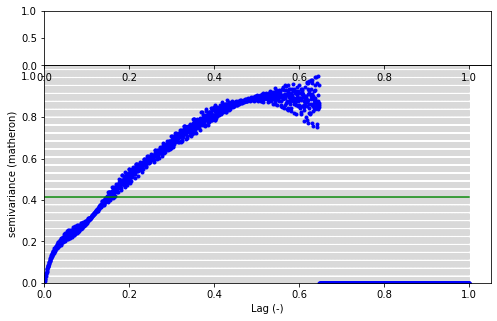

In [10]:
from skgstat import Variogram
V = Variogram(coords, values, n_lags=2000, normalize=True, maxlag=.5)
V.estimator = 'matheron'
V.model = 'spherical'

V.fit_method = 'lm'
V.plot()

In [ ]:
##### V.r ** 2, V.nrmse, V.describe()
# at max = .6, 30 bins
#(0.9865406852089206,
 #0.06934051550284305,
 #{'name': 'spherical',
 # 'estimator': 'matheron',
 # 'effective_range': 0.0007254415496648667,
 # 'sill': 132026.853463074,
 # 'nugget': 0})

# spherical is = 10 max = .7 range is 0.00117

In [ ]:
Vg = Variogram(coords, values, n_lags=30, normalize=True, maxlag=.6)
Vg.estimator = 'matheron'
Vg.model = 'gaussian'

Vg.fit_method = 'trf'
Vg.plot()

In [ ]:
Vg.r ** 2, Vg.nrmse, Vg.describe()

In [ ]:
Vg.transform([42.1], [-71.1])

In [ ]:
from skgstat import OrdinaryKriging
OK = OrdinaryKriging(V, min_points=1)

In [ ]:
OK.transform([42.1], [-71.1])

In [ ]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(values, geometry = [shapely.geometry.Point(coord) for coord in coords])

In [ ]:
gdf = gdf.rename(columns={0:'elevation'})

In [ ]:
gdf.to_file("brighton_elev.shp")